<a href="https://colab.research.google.com/github/Saul-Ochoa/Time-Series/blob/main/Sarimax/Candy_Production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Timse Series Candy Production**



In [28]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.6 MB/s eta 0:00:00


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#import shap

########################################
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor'  : '#212946',
    'axes.facecolor'    : '#212946',
    'savefig.facecolor' : '#212946',
    'axes.grid'         : True,
    'axes.grid.which'   : 'both',
    'axes.spines.left'  : False,
    'axes.spines.right' : False,
    'axes.spines.top'   : False,
    'axes.spines.bottom': False,
    'grid.color'        : '#2A3459',
    'grid.linewidth'    : '1',
    'text.color'        : '0.9',
    'axes.labelcolor'   : '0.9',
    'xtick.color'       : '0.9',
    'ytick.color'       : '0.9',
    'font.size'         : 12
}
plt.rcParams.update(dark_style)

In [2]:
url='https://raw.githubusercontent.com/Saul-Ochoa/Time-Series/main/Sarimax/candy_production.csv'

In [3]:
df=pd.read_csv(url,sep=',')
df.head()

,date,IPG3113N
0,1972-01-01,85.598809
1,1972-02-01,71.741404
2,1972-03-01,65.948809
3,1972-04-01,64.490724
4,1972-05-01,64.933842


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      564 non-null    object 
 1   IPG3113N  564 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


In [5]:
df.shape

(564, 2)

In [6]:
df.sample(20)

,date,IPG3113N
336,2000-01-01,122.988816
69,1977-10-01,108.789859
218,1990-03-01,94.675791
547,2017-08-01,113.390618
544,2017-05-01,102.847162
426,2007-07-01,91.102383
258,1993-07-01,95.611961
441,2008-10-01,114.048255
151,1984-08-01,81.124284
418,2006-11-01,130.700291


# **Data Preprocesing**

In [7]:
#la columna date debe cambiar a fecha
df['date']=pd.to_datetime(df['date'],format='%Y-%m-%d')
df.head()

,date,IPG3113N
0,1972-01-01,85.598809
1,1972-02-01,71.741404
2,1972-03-01,65.948809
3,1972-04-01,64.490724
4,1972-05-01,64.933842


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      564 non-null    datetime64[ns]
 1   IPG3113N  564 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.9 KB


In [9]:
df.set_index('date',inplace=True)
df.head()

,IPG3113N
date,
1972-01-01,85.598809
1972-02-01,71.741404
1972-03-01,65.948809
1972-04-01,64.490724
1972-05-01,64.933842


# EDA

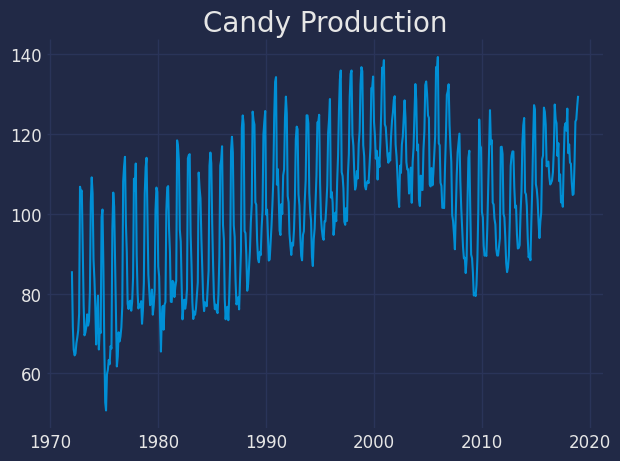

In [10]:
plt.plot(df)
plt.title('Candy Production',fontsize=20)
plt.show()

In [11]:
fig=px.line(df,x=df.index,y='IPG3113N',title='Candy Production',markers=True)
fig.show()

**Desconpose the ETS**

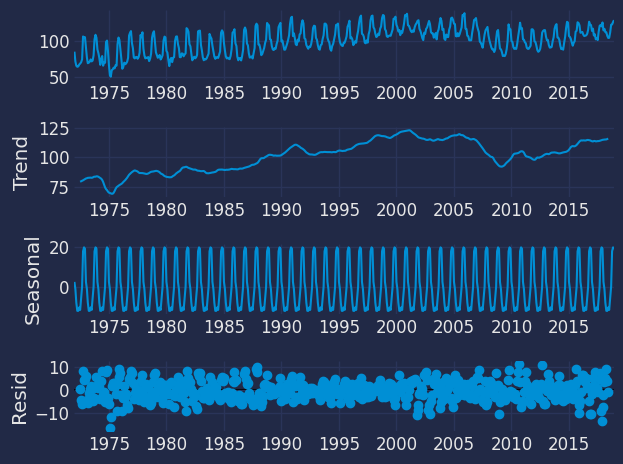

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data=seasonal_decompose(df,model='aditive')
decompose_data.plot()
plt.show()

# **Test Stationarity**

In [13]:
def test_stationarity(timeseries):
  timeseries.dropna(inplace=True)
  rolmean=timeseries.rolling(window=12).mean() #promedio
  rolstd=timeseries.rolling(window=12).std() #STD

  orig=plt.plot(timeseries,label='Original')
  mean=plt.plot(rolmean,label='Rolling mean')
  std=plt.plot(rolstd,label='Rolling std')


  plt.legend(loc='best')
  plt.title('TimeSeries data with rolling mean and std')
  plt.show()

  from statsmodels.tsa.stattools import adfuller

  df_test=adfuller(timeseries)
  df_output=pd.Series(df_test[0:4],index=['The Test statistic','Mackinnons aproximate p-value','usedLags','NOBS'])
  print('')
  print(df_output)




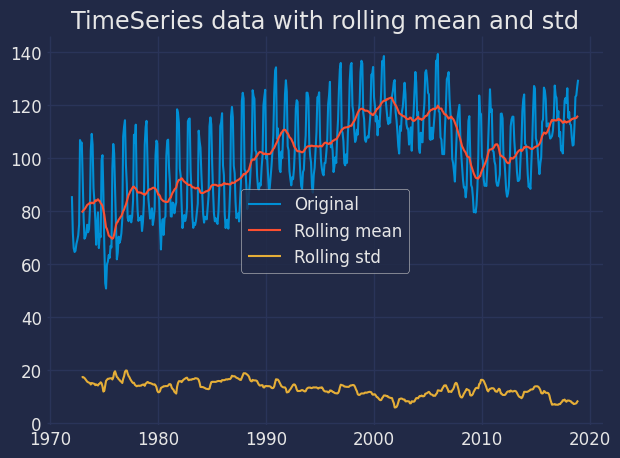


The Test statistic                -1.776015
Mackinnons aproximate p-value      0.392433
usedLags                          14.000000
NOBS                             549.000000
dtype: float64


In [14]:
test_stationarity(df)

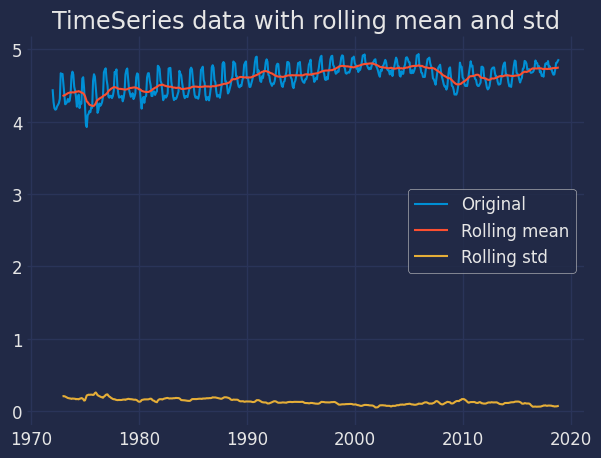


The Test statistic                -1.764078
Mackinnons aproximate p-value      0.398436
usedLags                          15.000000
NOBS                             548.000000
dtype: float64


In [15]:
df_log=np.log(df)
test_stationarity(df_log)

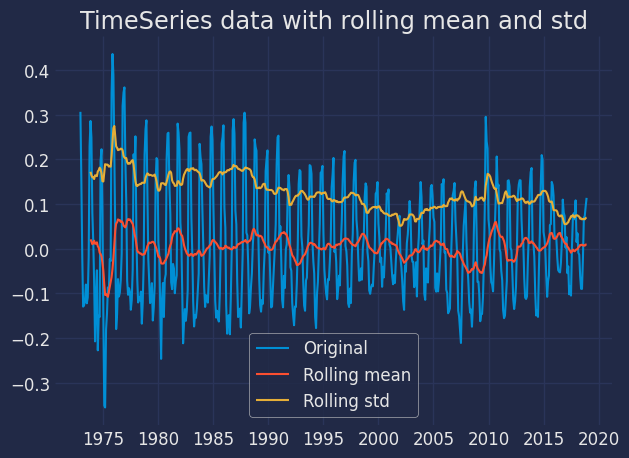


The Test statistic              -7.534563e+00
Mackinnons aproximate p-value    3.506126e-11
usedLags                         1.400000e+01
NOBS                             5.380000e+02
dtype: float64


In [16]:
#Si es estacionario, ya que  el p-value es menor a 0.05
ma=df_log.rolling(window=12).mean()
df_log_ma=df_log-ma
test_stationarity(df_log_ma)

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



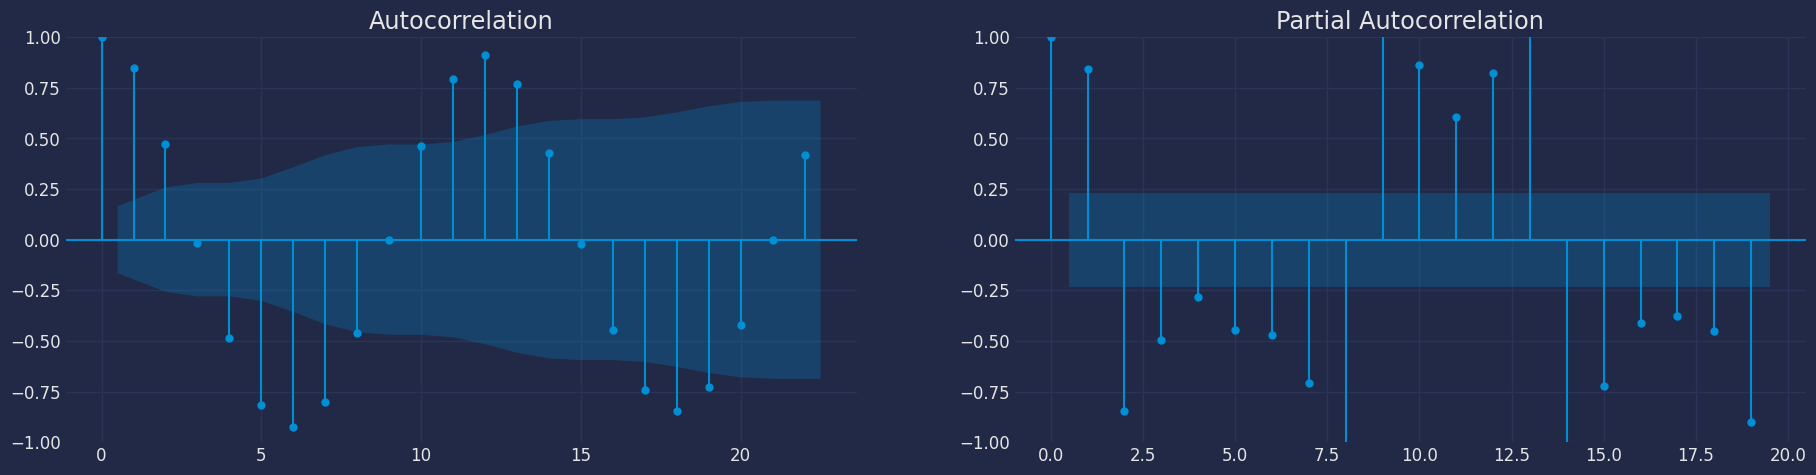

In [17]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

lag_acf=acf(df_log_ma,nlags=140)
lag_pacf=acf(df_log_ma,nlags=70)

fig,ax=plt.subplots(1,2,figsize=(20,5))
plot_acf(lag_acf,ax=ax[0]) #columna 0
plot_pacf(lag_pacf,ax=ax[1]) #columna 1
plt.show()

#P=2
#q=

# **Arima Model**

In [41]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
df_log_ma.dropna(inplace=True)
train,test=train_test_split(df_log_ma,test_size=0.10,shuffle=False)
#arima model
model_arima=ARIMA(train,order=(2,1,2))
model_arima_fit=model_arima.fit()
predictions=model_arima_fit.predict(start='2014-05-01',end='2018-12-01')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [42]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(test,predictions)
error

0.022579241074299903

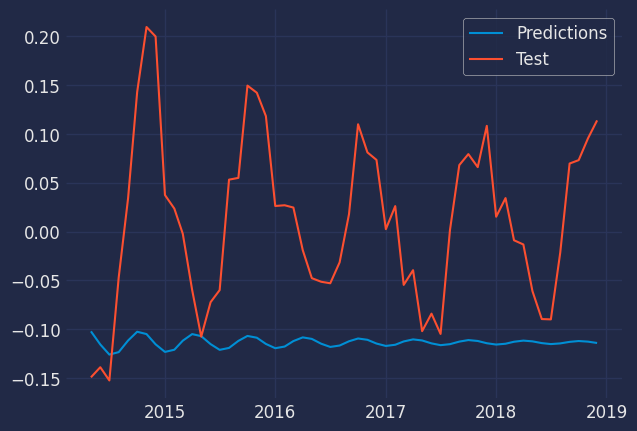

In [43]:
plt.plot(predictions,label='Predictions')
plt.plot(test,label='Test')
plt.legend(loc='best')
plt.show()

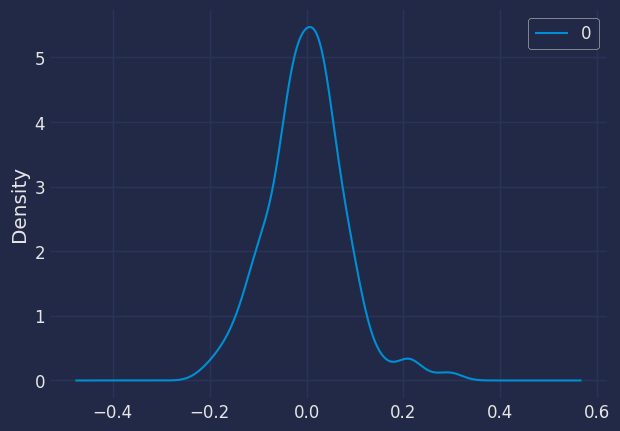

In [44]:
residual = pd.DataFrame(model_arima_fit.resid)
residual.plot(kind='kde')
plt.show()

# **Sarimax**

In [31]:
from pmdarima.arima import auto_arima
model = auto_arima(train, seasonal=True, m=12, suppress_warnings=True)

In [32]:
model.order

(1, 0, 0)

In [33]:
model.seasonal_order

(1, 0, 2, 12)

In [49]:
import statsmodels.api as sm
model_sarimax=sm.tsa.statespace.SARIMAX(train,order=(1,0,0),seasonal_order=(1,0,2,12))
model_sarimax_fit=model_sarimax.fit()
predictions=model_sarimax_fit.predict(start='2014-05-01',end='2018-12-01')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [50]:
error=mean_squared_error(test,predictions)
error

0.0017360412514641974

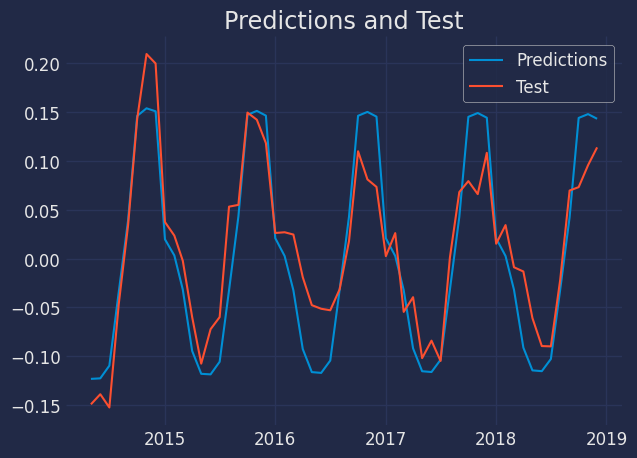

In [51]:
plt.plot(predictions,label='Predictions')
plt.plot(test,label='Test')
plt.title('Predictions and Test')
plt.legend(loc='best')
plt.show()

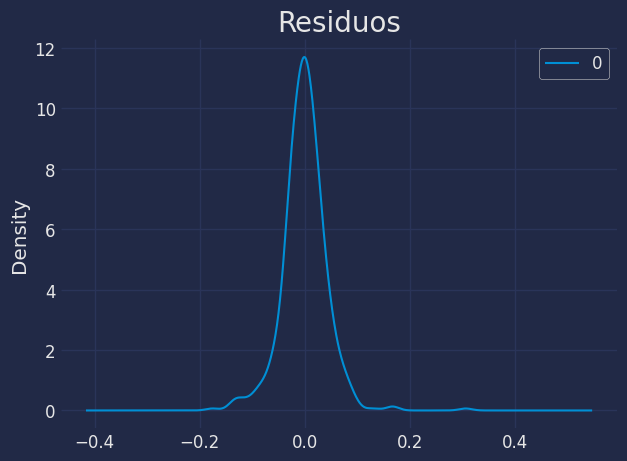

In [52]:
residual = pd.DataFrame(model_sarimax_fit.resid)
residual.plot(kind='kde')
plt.title('Residuos',fontsize=20)
plt.show()